In [1]:
import numpy as np
import pandas as pd

np.random.seed(1234)

n_samples = 100

x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)
x3 = np.random.randn(n_samples)

# 임의의 계수
a, b, c, d = 2.0, -1.5, 3.0, 5.0

# 종속 변수 생성 + noise
noise = np.random.randn(n_samples) * 0.5
y0 = a * x1 + b * x2 + c * x3 + d + noise

df = pd.DataFrame({'X1': x1, 'X2': x2, 'X3': x3, 'Y': y0})
df.head()

,X1,X2,X3,Y
0,0.471435,0.291205,-0.319561,4.810901
1,-1.190976,0.566534,-0.619993,0.263825
2,1.432707,0.503592,0.156998,7.472249
3,-0.312652,0.285296,-0.571455,3.551282
4,-0.720589,0.484288,1.057633,5.134221


In [2]:
from sklearn.model_selection import train_test_split

X = df[['X1', 'X2', 'X3']]
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [3]:
from sklearn.linear_model import LinearRegression

# 모델 학습
model = LinearRegression() # 절편 미포함 : LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

print("Intercept (절편):", model.intercept_)
print("Coefficients (계수):", model.coef_)

Intercept (절편): 5.052336995858368
Coefficients (계수): [ 1.96729623 -1.57951403  2.95907097]


In [4]:
# 예측
y_pred = model.predict(X_test)
y_pred

array([ 3.12664969,  7.06984042, -0.93769385,  6.69679378, -2.1026261 ,
        2.52734463,  5.65414199,  1.69225091,  9.82235049,  6.56760218,
        1.92804274,  5.23218495,  8.6534034 ,  5.00881546,  6.62089209,
       13.21558057,  4.4790476 , -0.02011646,  4.87736446, -0.01729664])

In [5]:
# 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred) # rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_manual = 1 - np.sum((y_test - y_pred) ** 2) / np.sum((y_test - y_test.mean()) ** 2)

mse, mae, r2, r2_manual

(0.1407066479342696, 0.2928034528632188, 0.989423116757431, 0.989423116757431)

In [ ]:
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
r2_train

In [ ]:
model.score(X_train, y_train)

In [ ]:
model.score(X_test, y_test

In [6]:
###############################################################################################################

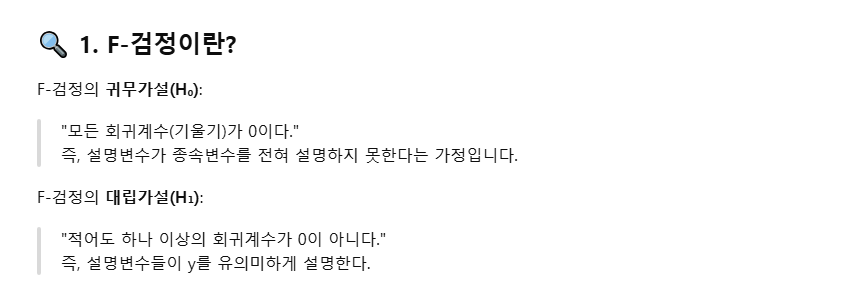
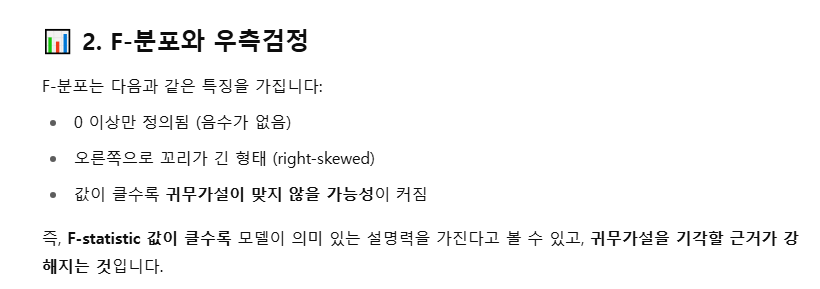
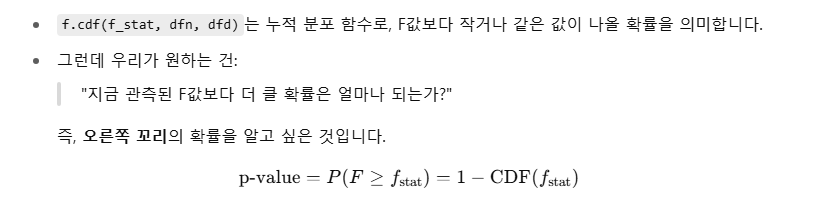

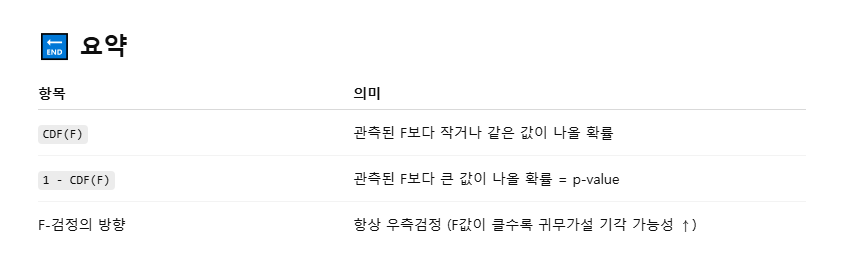

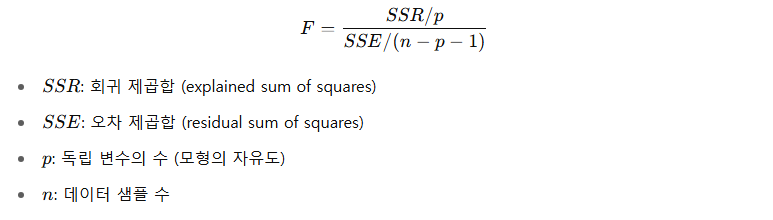

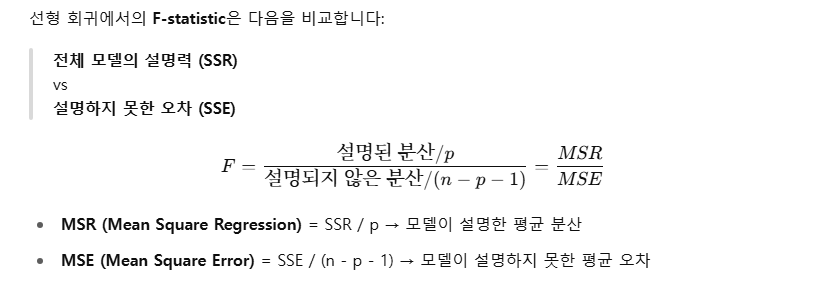

In [ ]:
# F 값 : 회귀모형의 설명력이 통계적으로 유의한지를 측정하는 지표
# 값이 클수록 좋은 방향으로 해석

In [11]:
from scipy.stats import f

n = len(y_test)
p = X_test.shape[1]

sse = np.sum((y_test - y_pred) ** 2)

y_mean = np.mean(y_test)
ssr = np.sum((y_pred - y_mean) ** 2)

msr = ssr / p
mse = sse / (n - p - 1)

f_stat = msr / mse
f_stat

527.4228113805169

In [13]:
p_value = 1 - f.cdf(f_stat, dfn=p, dfd=n-p-1)
p_value

3.3306690738754696e-16

In [14]:
# 기본 정보
n = len(y)             # 관측치 수
k = X.shape[1] + 1     # 변수 수 (절편 포함)

# MSE & RSS
rss = np.sum((y_test - y_pred) ** 2)
mse = mean_squared_error(y_test, y_pred)

# 로그우도 근사 (가정: 정규분포 오차)
log_likelihood = -n / 2 * (np.log(2 * np.pi) + np.log(rss / n) + 1)

# AIC
aic = 2 * k - 2 * log_likelihood

# AICc (수정 AIC)
aicc = aic + (2 * k * (k + 1)) / (n - k - 1)

# BIC
bic = k * np.log(n) - 2 * log_likelihood

# 출력
print(f"AIC  : {aic:.3f}")
print(f"AICc : {aicc:.3f}")
print(f"BIC  : {bic:.3f}")

AIC  : -65.264
AICc : -64.843
BIC  : -54.843
